## 1 Import PRAMS 3.5.2 TS = 168 and convert to arrays

In [1]:
import os
import numpy as np
import pylab as plt
import struct
import math
import matplotlib.pyplot as plt
import pickle

### DIS to array

In [2]:
dis = open('../inputs/discret.txt','r')
l = dis.readline()
l = dis.readline().strip().split()
nlay = int(l[0])
nrow = int(l[1])
ncol = int(l[2])
l = dis.readline()
l = dis.readline()
ct = 0
delr = []
while ct < ncol: 
    l = dis.readline().strip().split()
    for i in range(len(l)):
        delr.append(float(l[i]))
    ct+= len(l)
l = dis.readline()
ct = 0
delc = []
while ct < nrow: 
    l = dis.readline().strip().split()
    for i in range(len(l)):
        delc.append(float(l[i]))
    ct+= len(l)

top = []
l = dis.readline()
ct = 0
while ct <nrow*ncol:
    l = dis.readline().strip().split()
    for i in range(len(l)):
        top.append(float(l[i]))
    ct+= len(l)  
bot = []
for i in range(nlay):
    l = dis.readline()
    ct = 0
    while ct <nrow*ncol:
        l = dis.readline().strip().split()
        for i in range(len(l)):
            bot.append(float(l[i]))
        ct+= len(l)
print(len(bot))        
dis.close()
mask = np.zeros((nlay,nrow,ncol))
top = np.asarray(top).reshape((nrow,ncol))
for i in range(nlay):
    mask[i,:,:][top>0] = 1
bot = np.asarray(bot).reshape((nlay,nrow,ncol))
top = np.asarray(top).reshape((nrow,ncol))

#bot = np.ma.masked_where(mask == 0,bot)
#top = np.ma.masked_where(top == 0,top)
delr = np.asarray(delr)
delc = np.asarray(delc)
print(bot.shape)
print('ncells = ',nlay*nrow*ncol)

1263028
(13, 454, 214)
ncells =  1263028


### Properties to arrays

In [10]:
hk = []
for k in range(1,nlay+1):
    name = '../inputs/properties-prams-352/hk/hk%i.dat' %k
    data = np.loadtxt( name )
    data = data.astype(dtype='float')
    hk.append(data)
hk = np.array(hk)

vk = []
for k in range(1,nlay+1):
    name = '../inputs/properties-prams-352/vk/vk%i.dat' %k
    data = np.loadtxt( name )
    data = data.astype(dtype='float')
    vk.append(data)
vk = np.array(vk)


ss = []
for k in range(1,nlay+1):
    name = '../inputs/properties-prams-352/ss/ss%i.dat' %k
    data = np.loadtxt( name )
    data = data.astype(dtype='float')
    ss.append(data)
ss = np.array(ss)

sy = []
for k in range(1,nlay+1):
    name = '../inputs/properties-prams-352/sy/sy%i.dat' %k
    data = np.loadtxt( name )
    data = data.astype(dtype='float')
    sy.append(data)
sy = np.array(sy)

heads = []
for k in range(1,nlay+1):
    name = '../inputs/hydraulic-heads-prams-352/heads_6-168_lay%i.dat' %k
    data = np.loadtxt( name )
    data = data.astype(dtype='float')
    heads.append(data)
heads = np.array(heads)

name = '../inputs/recharge-rates-prams-352/rch_168.mat' 
data = np.loadtxt( name )
data = data.astype(dtype='float')
recharge = np.array(data)
#recharge.tofile('recharge.dat')

# PICKLE ARRAYS!!!
pickle.dump(recharge, open('../inputs/recharge.pkl', 'wb'))
pickle.dump(hk, open('../inputs/hk.pkl', 'wb'))
pickle.dump(top, open('../inputs/top.pkl', 'wb'))
pickle.dump(bot, open('../inputs/bot.pkl', 'wb'))
pickle.dump(mask, open('../inputs/mask.pkl', 'wb'))
pickle.dump(vk, open('../inputs/vk.pkl', 'wb'))
pickle.dump(ss, open('../inputs/ss.pkl', 'wb'))
pickle.dump(sy, open('../inputs/sy.pkl', 'wb'))
pickle.dump(heads, open('../inputs/heads.pkl', 'wb'))

In [11]:
layers = ['Superficial','Superficial','Superifical','Mirrabooka','Kardinya',
          'Pinjar','Wanneroo','Maringiniup','South Perth Shale','Parmelia','Otorowiri','Yarragadee','Yarragadee']

# PRAMS boundaries
west, east = 315250, 315250 + 214*500
south, north = 6394250, 6394250 + 454*500

def submodel_boundary(col0, col1, row0, row1):
    x0, x1 = west + (col0 * 500), west + (col1 * 500)
    y0, y1 = north - (row0 * 500), north - (row1 * 500)   
    return(x0,x1,y0,y1)
col0, col1 = 100, 300
row0, row1 = 200, 400
lay = 5 # Zero based
x0,x1,y0,y1 = submodel_boundary(col0, col1, row0, row1)

In [12]:
logfunc = lambda e: np.log10(e)
hk_log = logfunc(hk)
vk_log = logfunc(vk)

vk_log[6,row0:row1,col0:col1].shape

C:\Users\19904604\AppData\Local\Temp\ipykernel_3088\2894867976.py:1: RuntimeWarning: divide by zero encountered in log10
  logfunc = lambda e: np.log10(e)


(200, 114)

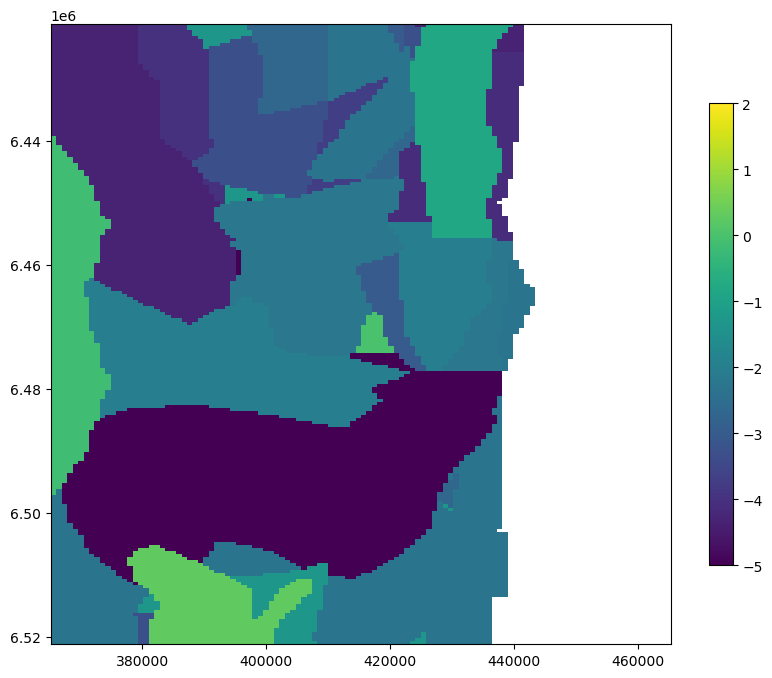

In [13]:
x = np.arange(x0+250,x1,500)
y = np.arange(y1+250,y0,500)
X, Y = np.meshgrid(x, y)
levels = np.arange(-10,80,10)
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(111, aspect='equal')
#ax1.set_title('RECHARGE')
im = ax1.imshow(vk_log[3,row0:row1,col0:col1], vmin = -5, vmax = 2, extent = [x0,x1,y0,y1])
#ax1.contour(x,y,recharge[0,row0:row1,col0:col1],levels,colors='Blue', linestyles='solid', linewidths=1.5)
fig.colorbar(im, ax=ax1, shrink = 0.6)

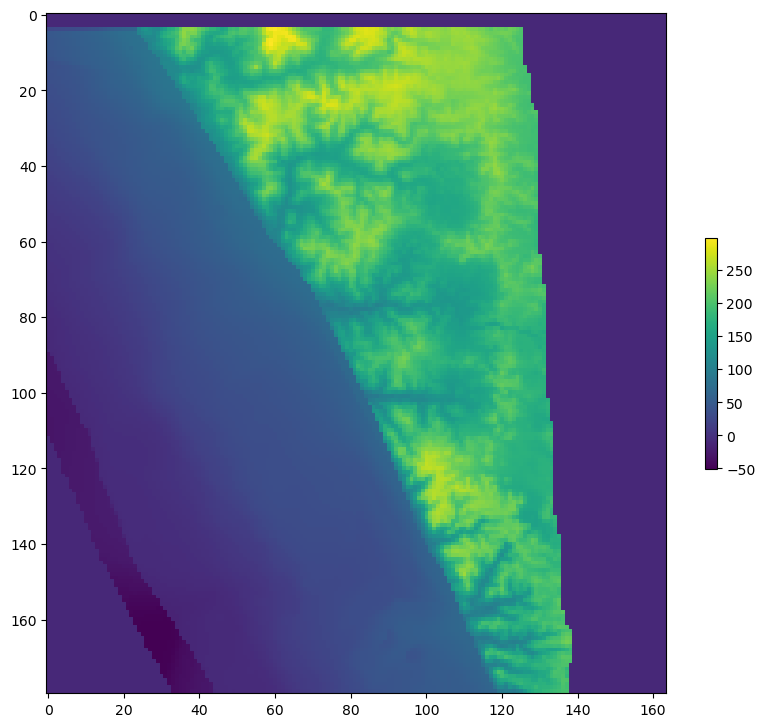

In [14]:
#2D
layer = 0
a = bot[layer,20:200,50:]
U,V = np.gradient(a)

plt.figure(figsize = (10,10))
plt.imshow(a)
plt.colorbar(shrink = 0.3)